In [4]:
!pip install sentence_transformers vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.9 MB/s eta 0:00:0000:01


In [67]:
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
# import torch
import spacy
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
data=pd.read_csv(r'newDataset.csv')

In [7]:
data['User Input'] = data['User Input'].str.lower()
data['User Input'] = data['User Input'].str.strip()

In [8]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
time_related_words = {"today", "yesterday", "tomorrow", "tonight", "morning", "evening", 
                      "afternoon", "day", "week", "month", "year", "these","past"}
def clean(text):
    words = re.sub(r'[^a-zA-Z\s]', '', text).split()
    return " ".join([word for word in words if word not in stop_words or word in time_related_words])
data['User_Input_cleaned'] = data['User Input'].apply(clean)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
nltk.download('punkt')
data['tokens'] = data['User Input'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
data['tokens']

0             [i, am, constantly, worried, these, days, .]
1        [i, ’, m, trying, ,, but, i, ’, m, still, cons...
2          [i, am, worried, about, health, these, days, .]
3            [every, day, i, ’, m, happy, and, excited, .]
4                [i, feel, happy, and, excited, lately, .]
                               ...                        
99995    [i, ’, m, trying, ,, but, i, ’, m, still, feel...
99996    [i, think, my, mental, state, is, feeling, ver...
99997    [sometimes, ,, i, think, i, 'm, ca, n't, sleep...
99998    [it, 's, been, hard, ,, i, am, feeling, much, ...
99999        [every, day, i, ’, m, happy, and, excited, .]
Name: tokens, Length: 100000, dtype: object

In [11]:
encoder = LabelEncoder()
data['PolarityEncoded'] = encoder.fit_transform(data['Polarity'])
data['CategoryEncoded'] = encoder.fit_transform(data['Category'])

In [12]:
data.head()

,User Input,Polarity,Extracted Concern,Category,Intensity,PolarityUpdated,User_Input_cleaned,tokens,PolarityEncoded,CategoryEncoded
0,i am constantly worried these days.,Negative,constantly worried,Health Anxiety,4,Neutral,constantly worried these days,"[i, am, constantly, worried, these, days, .]",0,4
1,"i’m trying, but i’m still constantly worried.",Negative,constantly worried,Eating Disorder,3,Neutral,im trying im still constantly worried,"[i, ’, m, trying, ,, but, i, ’, m, still, cons...",0,3
2,i am worried about health these days.,Positive,worried about health,Anxiety,9,Neutral,worried health these days,"[i, am, worried, about, health, these, days, .]",2,0
3,every day i’m happy and excited.,Positive,happy and excited,Health Anxiety,1,Positive,every day im happy excited,"[every, day, i, ’, m, happy, and, excited, .]",2,4
4,i feel happy and excited lately.,Positive,happy and excited,Depression,1,Neutral,feel happy excited lately,"[i, feel, happy, and, excited, lately, .]",2,2


In [13]:
def vectorize(text):
    vectorizer = TfidfVectorizer()
    return vectorizer.fit_transform(text)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
X_trainp, X_testp, y_trainp, y_testp = train_test_split(data['User Input'], data['PolarityUpdated'], test_size=0.2, random_state=42)
X_train_tfidfp = vectorize(X_trainp)
X_test_tfidfp = vectorize(X_testp)
classifierp = LogisticRegression(max_iter=200)
classifierp.fit(X_train_tfidfp, y_trainp)
y_predp = classifierp.predict(X_test_tfidfp)
print("Accuracy:", accuracy_score(y_testp, y_predp))
print("\nClassification Report:\n", classification_report(y_testp, y_predp, target_names=['Negative', 'Neutral', 'Positive']))


Accuracy: 0.98235

Classification Report:
               precision    recall  f1-score   support

    Negative       0.98      0.98      0.98      8620
     Neutral       0.98      0.98      0.98      9953
    Positive       1.00      1.00      1.00      1427

    accuracy                           0.98     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.98      0.98      0.98     20000



In [16]:
y_trainp

75220     Neutral
48955     Neutral
44966     Neutral
13568     Neutral
92727    Positive
           ...   
6265      Neutral
54886     Neutral
76820     Neutral
860      Negative
15795     Neutral
Name: PolarityUpdated, Length: 80000, dtype: object

In [17]:

def find_polarity(st):
    ni = [st]  
    input_vectorizer = TfidfVectorizer()
    input_vectorizer.fit(data['User Input']) 
    vec = input_vectorizer.transform(ni)
    prediction=classifierp.predict(vec)
    return prediction[0]

In [19]:
X_trainp.shape

(80000,)

In [20]:


nlp = spacy.load("en_core_web_sm")
user_input = "feeling"
doc = nlp(user_input)
for ent in doc.ents:
    print(ent.text, ent.label_)


In [21]:
concern_words = [
    'worried', 'anxious', 'stress', 'fear', 'doubt', 'concern', 'uneasy', 
    'apprehensive', 'distressed', 'job security', 'health', 'relationships', 
    'career', 'financial stability', 'family', 'education', 'future','happy','fine','good','ok','success'
]
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text
def extract_concerns(text):
    found_concerns = [word for word in concern_words if word in text]
    return found_concerns
nlp = spacy.load("en_core_web_sm")
def extract_entities(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents if ent.label_ in {
        "ORG", "PERSON", "GPE", "LOC", "PRODUCT", "EVENT", "WORK_OF_ART", "LAW"
    }]
    return entities
def extract_concern_phrases(text):
    phrases = []
    for concern in concern_words:
        if concern in text:
            phrases.append(concern)
    if 'feel anxious' in text:
        phrases.append('feel anxious')
    if 'job security' in text:
        phrases.append('job security')
    if 'financial stability' in text:
        phrases.append('financial stability')
    return phrases


In [22]:
input_text = "i am feeling much better these days."

cleaned_text = clean_text(input_text)
concerns_found = extract_concerns(cleaned_text)
entities_found = extract_entities(input_text)
phrases_found = extract_concern_phrases(cleaned_text)

print("Concerns:", concerns_found)
print("Entities:", entities_found)
print("Concern Phrases:", phrases_found)

Concerns: []
Entities: []
Concern Phrases: []


In [23]:
data['Concern Phrases'] = data['User_Input_cleaned'].apply(extract_concern_phrases)
data.head(20)

,User Input,Polarity,Extracted Concern,Category,Intensity,PolarityUpdated,User_Input_cleaned,tokens,PolarityEncoded,CategoryEncoded,Concern Phrases
0,i am constantly worried these days.,Negative,constantly worried,Health Anxiety,4,Neutral,constantly worried these days,"[i, am, constantly, worried, these, days, .]",0,4,[worried]
1,"i’m trying, but i’m still constantly worried.",Negative,constantly worried,Eating Disorder,3,Neutral,im trying im still constantly worried,"[i, ’, m, trying, ,, but, i, ’, m, still, cons...",0,3,[worried]
2,i am worried about health these days.,Positive,worried about health,Anxiety,9,Neutral,worried health these days,"[i, am, worried, about, health, these, days, .]",2,0,"[worried, health]"
3,every day i’m happy and excited.,Positive,happy and excited,Health Anxiety,1,Positive,every day im happy excited,"[every, day, i, ’, m, happy, and, excited, .]",2,4,[happy]
4,i feel happy and excited lately.,Positive,happy and excited,Depression,1,Neutral,feel happy excited lately,"[i, feel, happy, and, excited, lately, .]",2,2,[happy]
5,"sometimes, i think i'm feeling very low.",Negative,feeling very low,Insomnia,2,Neutral,sometimes think im feeling low,"[sometimes, ,, i, think, i, 'm, feeling, very,...",0,5,[]
6,my mind feels like it’s can't sleep well.,Negative,can't sleep well,Health Anxiety,6,Neutral,mind feels like cant sleep well,"[my, mind, feels, like, it, ’, s, ca, n't, sle...",0,4,[]
7,"it’s a struggle, i’m constantly worried.",Negative,constantly worried,Stress,10,Neutral,struggle im constantly worried,"[it, ’, s, a, struggle, ,, i, ’, m, constantly...",0,7,[worried]
8,"lately, i’ve been feeling very anxious.",Neutral,feeling very anxious,Health Anxiety,1,Negative,lately ive feeling anxious,"[lately, ,, i, ’, ve, been, feeling, very, anx...",1,4,[anxious]
9,"sometimes, i think i'm feeling hopeful.",Negative,feeling hopeful,Health Anxiety,3,Neutral,sometimes think im feeling hopeful,"[sometimes, ,, i, think, i, 'm, feeling, hopef...",0,4,[]


In [24]:
data['Category'].value_counts()

Category
Career Confusion    12599
Depression          12526
Eating Disorder     12517
Health Anxiety      12496
Stress              12495
Positive Outlook    12466
Insomnia            12462
Anxiety             12439
Name: count, dtype: int64

In [25]:
predef_categories = [
    "Career Confusion", 
    "Depression", 
    "Eating Disorder", 
    "Health Anxiety", 
    "Stress", 
    "Positive Outlook", 
    "Insomnia", 
    "Anxiety",
    "Burnout",
    "Social Anxiety",
    "Fear of Failure",
    "Loneliness",
    "Self-esteem Issues",
    "Relationship Problems",
    "Adjustment Disorder",
    "Grief"
]


In [50]:
from sentence_transformers import SentenceTransformer, util
import numpy as np
model = SentenceTransformer('all-MiniLM-L6-v2')
category_descriptions = [
    "Confusion about career path and direction",
    " persistent sadness and hopelessness",
    "Concerns regarding unhealthy eating habits",
    "Anxiety regarding health and medical issues",
    "Feelings of stress related to daily life",
    "Optimistic outlook on future possibilities",
    "Difficulty sleeping due to various reasons",
    "General anxiety about various situations",
    "Burnout from excessive work pressure",
    "Social anxiety in public situations",
    "Fear of failure in personal and professional life",
    "Feelings of loneliness in a crowded room",
    "Issues with self-esteem and self-worth",
    "Problems within personal relationships",
    "Struggles with adjustment to new situations",
    "Grief from the loss of a loved one"
]
category_embeddings = model.encode(category_descriptions)
# for text in data['text']:
def classify_Category(text):
    text_embedding = model.encode(text)
    similarities = util.cos_sim(text_embedding, category_embeddings)
    best_category = predef_categories[np.argmax(similarities)]
#     print(similarities)
    return f"Category: {best_category}\n"


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [48]:
txt="im no feeling well"
classify_Category(txt)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.0248,  0.3254,  0.0689,  0.2328,  0.2891,  0.1306,  0.1079,  0.2167,
          0.0972,  0.1538,  0.1582,  0.2454,  0.1778,  0.0879,  0.1565,  0.2326]])


'Category: Depression\n'

In [27]:
analyzer = SentimentIntensityAnalyzer()
lyrics = "I'm extremenlyyyyy sad."
sentiment = analyzer.polarity_scores(lyrics)
print("Sentiment Analysis Results:", sentiment)

Sentiment Analysis Results: {'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'compound': -0.4767}


In [28]:
analyzer = SentimentIntensityAnalyzer()
def calculate_sentiment(text):
    return analyzer.polarity_scores(text)
def scale_compound_score(sentiment_scores):
    compound_score = sentiment_scores['compound']
    scaled_score = ((compound_score + 1) / 2) * 10
    return scaled_score
data['Sentiment Scores'] = data['User Input'].apply(calculate_sentiment)
data['Scaled Compound Score'] = data['Sentiment Scores'].apply(scale_compound_score).apply(np.ceil)
data.head()

,User Input,Polarity,Extracted Concern,Category,Intensity,PolarityUpdated,User_Input_cleaned,tokens,PolarityEncoded,CategoryEncoded,Concern Phrases,Sentiment Scores,Scaled Compound Score
0,i am constantly worried these days.,Negative,constantly worried,Health Anxiety,4,Neutral,constantly worried these days,"[i, am, constantly, worried, these, days, .]",0,4,[worried],"{'neg': 0.306, 'neu': 0.694, 'pos': 0.0, 'comp...",4.0
1,"i’m trying, but i’m still constantly worried.",Negative,constantly worried,Eating Disorder,3,Neutral,im trying im still constantly worried,"[i, ’, m, trying, ,, but, i, ’, m, still, cons...",0,3,[worried],"{'neg': 0.318, 'neu': 0.682, 'pos': 0.0, 'comp...",3.0
2,i am worried about health these days.,Positive,worried about health,Anxiety,9,Neutral,worried health these days,"[i, am, worried, about, health, these, days, .]",2,0,"[worried, health]","{'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'comp...",4.0
3,every day i’m happy and excited.,Positive,happy and excited,Health Anxiety,1,Positive,every day im happy excited,"[every, day, i, ’, m, happy, and, excited, .]",2,4,[happy],"{'neg': 0.0, 'neu': 0.396, 'pos': 0.604, 'comp...",9.0
4,i feel happy and excited lately.,Positive,happy and excited,Depression,1,Neutral,feel happy excited lately,"[i, feel, happy, and, excited, lately, .]",2,2,[happy],"{'neg': 0.0, 'neu': 0.396, 'pos': 0.604, 'comp...",9.0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(data['User Input'], data['Scaled Compound Score'], test_size=0.2, random_state=42)
vectorizers = TfidfVectorizer()
X_train_tfidf = vectorizers.fit_transform(X_train)
X_test_tfidf = vectorizers.transform(X_test)
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)
y_pred = classifier.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8216

Classification Report:
               precision    recall  f1-score   support

         2.0       1.00      0.84      0.91       571
         3.0       0.92      0.73      0.81      3009
         4.0       0.86      0.91      0.88      5877
         5.0       0.91      0.86      0.88      3009
         6.0       0.54      0.76      0.63      1349
         7.0       0.55      0.78      0.65      1168
         8.0       0.82      0.93      0.87      2523
         9.0       0.89      0.64      0.74      2060
        10.0       1.00      0.62      0.77       434

    accuracy                           0.82     20000
   macro avg       0.83      0.78      0.79     20000
weighted avg       0.84      0.82      0.82     20000



In [57]:
def predict_score(user_input):
    input_vector = vectorizers.transform([user_input])
    
    predicted_score = classifier.predict(input_vector)
    
    return predicted_score[0]

In [80]:
import uuid
from datetime import datetime
def save_user_sentiment(user_id, user_input):
    if user_id.lower() == "na":
        user_id = str(uuid.uuid4())  
    
    predicted_score = predict_score(user_input)
    date = datetime.now().strftime("%Y-%m-%d")
    
    data = pd.DataFrame([[user_id, date, predicted_score]], columns=["UserID", "Date", "Score"])
    data.to_csv("user_sentiment_data.csv", mode='a', header=False, index=False)
    
    print(f"User ID: {user_id} | Date: {date} | Score: {predicted_score}")
    return user_id

def plot_sentiment_trends(user_id):
    data = pd.read_csv("user_sentiment_data.csv", names=["UserID", "Date", "Score"])
    user_data = data[data["UserID"] == user_id]
    user_data.loc[:,"Date"] = pd.to_datetime(user_data["Date"])
    plt.figure(figsize=(10, 5))
    plt.scatter(user_data["Date"], user_data["Score"], marker='o', color='b')
    plt.title(f"Sentiment Score Trend for User ID: {user_id}")
    plt.xlabel("Date")
    plt.ylabel("Sentiment Score (out of 10)")
    plt.ylim(0, 10)
    plt.grid(True)
    plt.show()
# user_input = input("Enter your text: ")


Enter User ID (or 'NA' to assign a new ID):  b8abaa88-cc96-4506-8a84-7bac16424448
give input: sad


Neutral


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Category: Depression

The predicted scaled score for your input is: 4.0
User ID: b8abaa88-cc96-4506-8a84-7bac16424448 | Date: 2024-10-27 | Score: 4.0


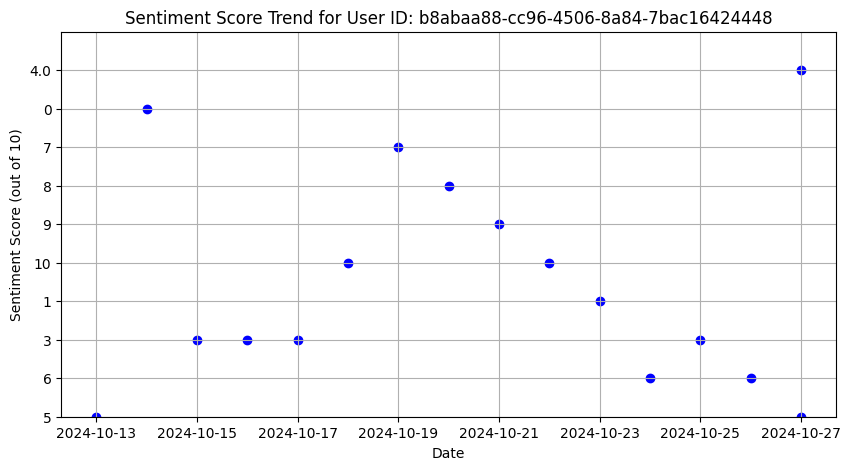

In [83]:
user_id = input("Enter User ID (or 'NA' to assign a new ID): ")
userip=input("give input:")
print(find_polarity(userip))
score = predict_score(userip)
print(classify_Category(userip))
print(f"The predicted scaled score for your input is: {score}")
assigned_id = save_user_sentiment(user_id, userip)
plot_sentiment_trends(assigned_id)

